<a href="https://colab.research.google.com/github/Starlight3/ML-tasks/blob/master/preparatory_notebooks/F3_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook: F3 -- Logistic Regression

*Authors*: Amir Baghi, Daniel Gedon<br>
*Date*: 31.10.2023<br>
*Updated*: 05.11.2024

This notebook is complementary to lecture F3 about Logistic Regression in order to highlight the key concepts. The focus will be on
1. Understanding and visualizing different loss functions: **Misclassification** and **Logistic Loss**
2. A basic classifier and its **Misclassification Loss** and modifying the parameters to see the effects on the loss.
3. Finally, the same classifier with its **Logistic Loss** and visualizing the loss surface.

Please read the instructions and play around with the notebook where it is described.

In [1]:
pip install -q ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00


In [2]:
# imports necessary libraries
%matplotlib inline

import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

np.random.seed(42) # fix the random seed

---

## 1. Loss Functions: Misclassification and Logistic Loss

In this section we will look at two loss functions: the misclassification loss and the logistic loss.


The **misclassification loss** is defined as

$$
L_{\text{misclass}}(y, \hat{y}(x;\theta)) = \begin{cases}
0 & y \cdot \hat{y}(x;\theta) \ge 0 \\
1 & y \cdot \hat{y}(x;\theta) \lt 0
\end{cases}
$$

where $y$ is the true label for input $x$ in $\{-1, 1\}$ and $\hat{y}(x;\theta)$ is the predicted label from our machine learning model. This loss is very intuitive: it is 1 if the prediction and the true value don't match and it's 0 otherwise.

Moreover, for the logistic regression case, where the decision boundary is linear given by $\theta^T x$, the **logistic loss** is defined as

$$
L_{\text{logistic}}(y, x;\theta) = \ln(1 + \exp(-y \cdot \theta^T x)).
$$

The logistic loss is basically a *continuous* approximation to the misclassification loss, taking into account also **how far away** our predictions are from the real labels.

Below, we have some helper functions for visualizing each of these loss functions. Skip over and go to the next box.

In [3]:
def plot_misclassification_loss():
    yyhat = np.linspace(-5, 5, 100)
    loss = np.where(yyhat < 0, 1, 0)
    plt.figure(figsize=(5, 3))
    plt.plot(yyhat, loss)
    plt.xlabel('$y \cdot \hat{y}(x)$')
    plt.ylabel('Misclassification Loss')
    plt.show()

def plot_logistic_loss():
    yyhat = np.linspace(-5, 5, 100)
    loss = np.log(1 + np.exp(-yyhat))
    plt.figure(figsize=(5, 3))
    plt.plot(yyhat, loss, c='orange') # try also with semilogy
    plt.xlabel('$y \cdot \hat{y}(x)$')
    plt.ylabel('Logistic Loss')
    plt.show()

Below, we visualize each of the loss functions in a 2D plot. The x-axis is the product of the real label $y$ and the predicted value $\hat{y}(x; \theta)$, and the y-axis is the loss $L(y, \hat{y}(x; \theta))$.

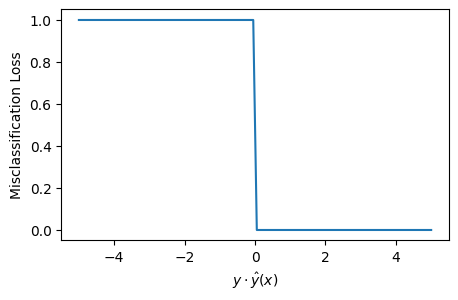

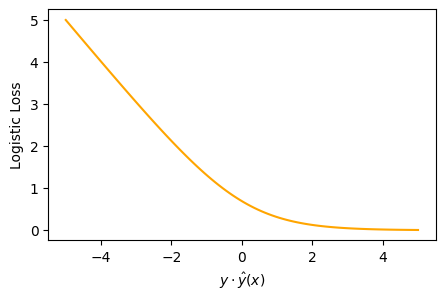

In [4]:
# Plot the misclassification loss
plot_misclassification_loss()

# Plot the logistic loss
plot_logistic_loss()

---

## 2. A basic classifier + the Misclassification Loss

In this section, we will look at a basic classifier and its misclassification loss. We will also modify the parameters to see the effects on the loss and the decision boundary.

We model our basic classifier as follows:

$$
\hat{y}(x_1, x_2;\theta_1, \theta_2) = \text{sign}(\theta_1 x_1 + \theta_2 x_2)
$$

where $\theta_1$ and $\theta_2$ are the weights. If we consider $\theta= [\theta_1, \theta_2]$, then we can rewrite the above equation in a more compact form:

$$
\hat{y}(x;\theta) = \text{sign}(\theta^T x)
$$

Using this model, we can compute the average misclassification loss given a set of parameters $\theta$. This will be our cost function:

$$
J_{\text{misclass}}(\theta) = \frac{1}{N} \sum_{i=1}^N L_{\text{misclass}}(y_i, \hat{y}(x_i;\theta))
$$

where $N$ is the number of samples in the dataset.

Below we generate our dataset and there are some helper functions to visualize the decision boundary and calculate the misclassification loss. Skip over and go to the next box.

In [5]:
# generate synthetic dataset
x = np.random.rand(100, 2) * 4
y = np.where(x[:, 1] > x[:, 0], 1, -1)

def calculate_misclassification_cost(x, y, theta):
    return np.sum(np.where(y * np.dot(x, theta) < 0, 1, 0)) / len(y)

def plot_decision_boundary(x, y, theta):
    plt.figure(figsize=(5, 3))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm.coolwarm)
    x1 = np.linspace(0, 4, 100)
    x2 = -theta[0] / theta[1] * x1
    plt.plot(x1 , x2, c='black')

    mesh = np.meshgrid(np.linspace(0, 4, 100),
                       np.linspace(0, 4, 100))

    Z = np.sign(np.dot(np.c_[mesh[0].ravel(), mesh[1].ravel()], theta))
    Z = Z.reshape(mesh[0].shape)
    plt.pcolormesh(mesh[0], mesh[1], Z, cmap=cm.coolwarm, alpha=0.2)

    plt.xlim([0, 4])
    plt.ylim([0, 4])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

Below, we plot the decision boundary for a classifier with the initialized $\theta$ parameters, alongside our data points which are colored according to their true label. Moreover, the misclassification cost is also calculated for the classifier and printed.

Tasks:
1. Play around with the parameters $\theta_1$ and $\theta_2$ to:
    - Observe how the decision boundary changes.
    - Observe how the misclassification cost changes.
2. Try to minimize the cost by changing $\theta_1$ and $\theta_2$ in order to separate the data points as best as possible.

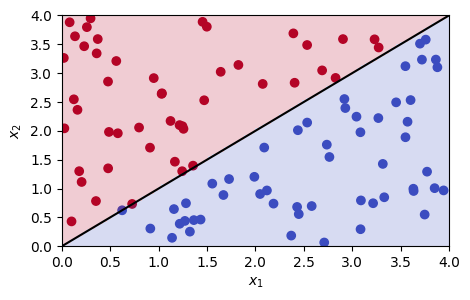

The misclassification rate:  0.0


In [19]:
# Our initial weight vector, i.e. theta1 and theta2
theta  = [-0.1, 0.1]

# Plot the decision boundary
plot_decision_boundary(x, y, theta)

# Calculate the misclassification cost
print("The misclassification rate: ", calculate_misclassification_cost(x, y, theta))

---

## 2. The same classifier + the Logistic Loss

In this section, we will look at the same classifier as before, but this time we will use the logistic loss instead of the misclassification loss. We will also visualize the loss surface in addition to the decision boundary.

Remembering our definition of the logistic loss, we can compute the average logistic loss given a set of parameters $\theta$. This will be our cost function:

\begin{align}
J_{\text{logistic}}(\theta) &= \frac{1}{N} \sum_{i=1}^N L_{\text{logistic}}(y_i, x_i; \theta) \\
                            &= \frac{1}{N} \sum_{i=1}^N \ln(1 + \exp(-y_i \cdot \theta^T x_i))
\end{align}

where $N$ is the number of samples in the dataset.

Below are some helper functions to calculate and visualize the logistic loss function. Skip over and go to the next box.

In [15]:
def calculate_logistic_cost(x, y, theta):
    return np.sum(np.log(1 + np.exp(-y * np.dot(x, theta)))) / len(y)

def plot_logistic_loss(x, y, azimuth, elevation):
    theta1 = np.linspace(-1, 1, 50)
    theta2 = np.linspace(-1, 1, 50)
    theta1, theta2 = np.meshgrid(theta1, theta2)
    loss = np.zeros(theta1.shape)
    for i in range(len(theta1)):
        for j in range(len(theta2)):
            theta = [theta1[i, j], theta2[i, j]]
            loss[i, j] = calculate_logistic_cost(x, y, theta)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(theta1, theta2, loss, cmap=cm.viridis)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel('Logistic Loss')
    ax.view_init(elevation, azimuth)
    ax.tick_params(axis='x', which='major', pad=3)
    ax.tick_params(axis='y', which='major', pad=3)
    ax.set_xticks(np.linspace(-1, 1, 5))
    ax.set_yticks(np.linspace(-1, 1, 5))
    plt.show()

def plot_log_loss_interactive(x, y):
    interact(plot_logistic_loss, x=widgets.fixed(x), y=widgets.fixed(y),
    azimuth=widgets.FloatSlider(min=0, max=360, step=10, value=0),
    elevation=widgets.FloatSlider(min=0, max=90, step=10, value=20))

Below, we again draw the decision boundary of our classifier for the same dataset. However, this time we calculate and print the logistic loss instead of the misclassification loss. Moreover, the loss surface is also plotted, where you can see how the loss changes for different values of $\theta_1$ and $\theta_2$, for this specific dataset.

Task:
1. Try again to minimize the cost by changing $\theta_1$ and $\theta_2$ in order to separate the data points as best as possible. Note how the best decision boundary does not yield a cost of 0, but rather a small value now. What does this mean for the classifier?
2. Inspect the loss surface and see how the loss changes for different values of $\theta_1$ and $\theta_2$. What parameters yield the lowest loss? Is it the same as the one you found?

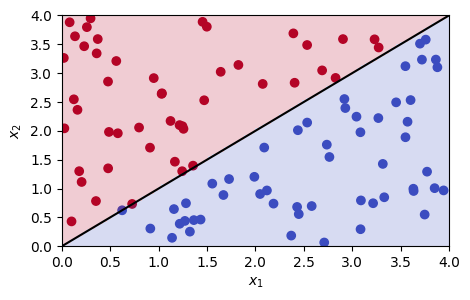

The logistic loss:  0.627834422018698


interactive(children=(FloatSlider(value=0.0, description='azimuth', max=360.0, step=10.0), FloatSlider(value=2…

In [21]:
# Our initial weight vector, i.e. theta1 and theta2
theta = [-0.1, 0.1]

# Plot the decision boundary
plot_decision_boundary(x, y, theta)
print("The logistic loss: ", calculate_logistic_cost(x, y, theta))

# Plot the logistic loss
plot_log_loss_interactive(x, y)

---

# Take-home message

* Logistic regression is used for classification problems.
* Logisitc regression is a linear model with a certain decision boundary.
* We can use the misclassification loss or the logistic loss. The latter gives a better notion of the distance of a sample to the decision boundary.

**Recommendation for further reading:** The material covered in this notebook is well-covered in the beginning of Chapter 3.2 in the course book.